###Welcome

In this project we will be using the K-Means Clustering to analyze and cluster images of handwritten digits

K-Means is a fantastic Unsupervised Machine Learning algorithm which can be used for a variety of purposes from recommendation engines to image segmentation, it is used in search engines and can also be used in market segmentation amongst others

In this project we will be working with a dataset inside the scikit learn library

This will be a short project to get familiar with the K-Means Clustering Algorithm

In [24]:
#Okay let's first import the libraries we will use throughout the project
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

digits = datasets.load_digits()

In [25]:
#'Let's go through the dataset description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [26]:
#Now let's see what the data looks like
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Each list contains 64 values, these include the pixel colours of the images from 0 being white to 16 being black

In [27]:
#Now print the targets
print(digits.target)

[0 1 2 ... 8 9 8]


Great we will now take a look at one of the images

<Figure size 432x288 with 0 Axes>

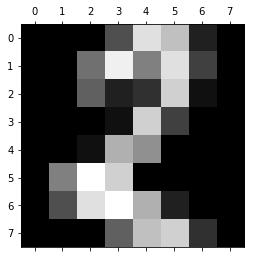

In [12]:
plt.gray() 
#let's see image at index 50
plt.matshow(digits.images[50])
plt.show()

In [13]:
#Seems like a 2 probably? Let's find out
print(digits.target[50])

2


Let's take a look at a couple more images

<Figure size 432x288 with 0 Axes>

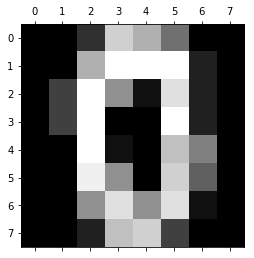

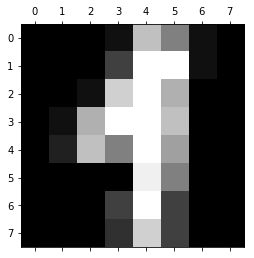

0
1


In [29]:
plt.gray() 
plt.matshow(digits.images[20])
plt.matshow(digits.images[90])
plt.show()
print(digits.target[20])
print(digits.target[90])

###We will now build the model, knowing that we have number from 0 to 9 that means we will use 10 different clusters.

The random state is to ensure that the model is build the exact same way every time we run it

In [81]:
#Build the model
model = KMeans(n_clusters=10, random_state=42)

#Fit the data to the model
model.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

###Okay time to visualize the centroids 

These are the different clusters that the model selected 

A point will be labeled accordingly depending on the proximity to any of these clusters, in other words if we want to know the number of any given point, that label will depend on the proximity to the nearest centroid

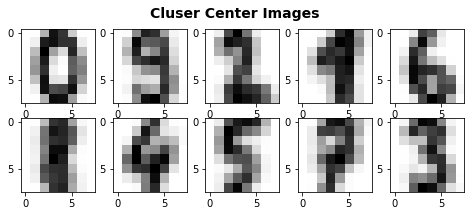

In [82]:
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')

for i in range(10):
  # Initialize subplots
  ax = fig.add_subplot(2, 5, 1 + i)
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

###Time to test our model

We will feed it the data with corresponding to this set of numbers 9320 and see if it can accurately label them

In [97]:
numbers_prediction = np.array([
[0.00,0.00,0.29,2.12,3.27,2.95,0.08,0.00,0.00,0.83,6.68,5.92,4.62,6.23,3.80,0.00,0.00,3.04,4.78,0.00,0.00,2.36,5.64,0.00,0.00,1.59,6.78,3.34,3.04,5.16,5.41,0.00,0.00,0.00,2.19,4.48,4.56,4.93,5.48,0.00,0.00,0.00,0.00,0.00,0.00,0.91,6.32,0.00,0.00,0.00,0.00,0.00,0.00,0.15,6.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.02,0.00],
[0.00,1.60,3.05,2.20,0.90,0.00,0.00,0.00,0.00,2.50,4.57,5.55,6.99,5.23,0.00,0.00,0.00,0.00,0.00,0.00,0.22,6.76,0.99,0.00,0.00,0.00,0.00,2.56,5.90,7.13,0.76,0.00,0.00,0.00,0.00,5.08,5.32,6.91,2.20,0.00,0.00,0.00,0.00,0.00,0.44,4.56,3.81,0.00,0.00,6.16,6.84,7.06,7.44,5.92,1.14,0.00,0.00,1.20,0.75,0.75,0.00,0.00,0.00,0.00],
[0.00,0.45,1.44,0.82,0.00,0.00,0.00,0.00,2.42,7.37,6.31,7.14,3.10,0.00,0.00,0.00,0.15,0.30,0.00,1.29,6.78,0.00,0.00,0.00,0.00,0.00,0.00,1.21,6.70,0.00,0.00,0.00,0.00,0.00,0.45,6.09,3.27,0.00,0.00,0.00,0.00,1.28,6.53,4.86,1.44,1.51,1.52,0.22,0.00,6.37,7.00,6.84,6.38,6.07,6.08,1.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,2.57,5.46,6.00,3.33,0.00,0.00,0.23,5.54,6.37,2.79,2.03,6.70,1.90,0.00,3.34,5.24,0.07,0.00,0.00,2.81,5.33,0.00,3.81,3.19,0.00,0.00,0.00,0.53,6.85,0.00,3.12,4.71,0.00,0.00,0.00,0.30,6.85,0.00,0.68,6.84,3.80,0.07,1.35,4.92,5.33,0.00,0.00,0.60,5.85,7.07,7.14,4.77,0.60,0.00,0.00,0.00,0.07,1.13,0.30,0.00,0.00,0.00]
])

We will now predict the labels 

The for loop is to map out the labels with the correct digits they represent

In [98]:
numbers_prediction = model.predict(numbers_prediction)

for i in range(len(numbers_prediction)):
  if numbers_prediction[i] == 0:
    print(0, end='')
  elif numbers_prediction[i] == 1:
    print(9, end='')
  elif numbers_prediction[i] == 2:
    print(2, end='')
  elif numbers_prediction[i] == 3:
    print(1, end='')
  elif numbers_prediction[i] == 4:
    print(6, end='')
  elif numbers_prediction[i] == 5:
    print(8, end='')
  elif numbers_prediction[i] == 6:
    print(4, end='')
  elif numbers_prediction[i] == 7:
    print(5, end='')
  elif numbers_prediction[i] == 8:
    print(7, end='')
  elif numbers_prediction[i] == 9:
    print(3, end='')

9320

###Fantastic! our model labeled the digits perfectly

This will not always be the case due to the size of the dataset that we used, in fact most of the time the model will get it wrong with 1-2 numbers. In order to increase the accuracy of the model we would need a much bigger dataset

That's it for this project

Thank you for reading